# Hands-on 09: Modulação Digital (modulação, demodulação e desempenho em ruído AWGN)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Entender os processos de transmissão e recepção digital em banda-base (sinais ortogonais e antipodais);
- Entender recepção ótima em canais AWGN;
- Entender como fazer análise de desempenho de um enlace de comunicação digital sujeito a canal AWGN (traçar e analisar curva BER vs $E_B/N_0$ via simulação de Monte Carlo).

# Transmissão e Recepção digital (conceitos básicos)

Uma maneira muito tradicional de mostrar um sistema de comunicação é por meio da cadeia de comunicação digital. Nessa representação, vários blocos funcionais formam a cadeia de transmissão e de recepção. Cada bloco recebe um sinal de entrada, realiza algum processamento e disponibiliza um sinal em sua saída, o qual será entrada do bloco subsequente, como ilustrado na figura a seguir.

![fig_cadeia_digital](./FIGS/HD_09/cadeia_digital.png)

Se a fonte de informação for analógica, será necessário sua digitalização por meio de um conversor A/D. Como mostrado no [Hands-on 06: Transição analógico/digital (amostragem, reconstrução ideal, quantização, codificação PCM e multiplexação TDM)](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004/blob/master/h06.ipynb), um sinal contínuo é transformado em uma sequência de bits após os processos de **Amostragem**, **Quantização** e **Codificação**. Essas são as etapas da conversão A/D. Se a fonte já for digital, e.g. um arquivo de texto, é necessário saber qual a formatação dos dados. Neste caso, a formatação é simplesmente uma tabela que mapea cada caracter em uma sequência binária distinta, por exemplo o ASCII (American Standard Code for Information Interchange). Ver tabela [ASCII](http://web.alfredstate.edu/faculty/weimandn/miscellaneous/ascii/ASCII%20Conversion%20Chart.gif). Nessa representação, por exemplo, a letra **A** é a palavra binária de 8 bits: **01000001**.

Se necessário, a **codificação de fonte** comprime os dados almejando eficiência. Já o **codificador de canal** insere bits redundantes para proteger a informação a ser transmitida e diminuir a taxa de erro de bit (BER). Segurança é papel do **Encriptador**.

Se vários sinais precisam ser enviados usando o mesmo meio de transmissão, o **multiplexador** faz o papel de juntar os sinais. 

Se a transmissão for em banda-base (e.g. por meio de cabos), o **modulador digital em banda-base (modulador por pulsos)** é o dispositivo que recebe uma sequência de bits 0's e 1's e a transforma em uma sequência de pulsos (digitais e contínuos no tempo). Assim, o trem de pulsos assume o papel da portadora e a sequência de bits o papel do sinal modulante. Esse tipo de modulação também é chamada de codificação de linha.

Se a transmissão for através de meio sem fio, uma **modulação em banda-passante** é exigida para tornar possível gerar uma onda em alta frequência capaz de, ao injetada em uma antena, se propagar via onda eletromagnética.

# Transmissão e Recepção digital em banda-base (conceitos básicos)

Mais especificamente para transmissão binária em banda-base, o modulador ao receber o bit 0 devolve um símbolo $s_{0}(t)$ de duração $T_b$. Da mesma forma, o pulso $s_{1}(t)$ resulta do bit 1. Logo, cada bit será mapeado num sinal correspondente conforme:

$$ 0 \mapsto s_{0}(t), \; 0\leq t \leq T_{b} $$

$$ 1 \mapsto s_{1}(t), \; 0\leq t \leq T_{b} $$

Assim, podemos definir um parâmetro muito importante do transmissor digital, a taxa de transmissão (ritmo de envio de bits ou taxa de bits). Ela é especificada como $R$ bits por segundo (bps) e se relaciona com o tempo do bit ($T_b$) da seguinte forma: 

$$T_{b}=\frac{1}{R}$$.

Uma fonte inevitável de erros no processo de transmissão/recepção é o ruído (geralmente modelado como um ruído AWGN). Representando o ruído como $n(t)$ e o sinal recebido como $r(t)$, podemos escrever:

$$r(t)= s_{i}(t)+n(t), \; i=\left \{ 0,1 \right \} $$

Dois tipos sinais são especialmente importantes para exemplificarmos o processo de modulação digital, são eles: **Sinais Ortogonais** e **Sinais Anitipodais**. Inicialmente, faremos alguns experimentos com sinais ortonogais e posteriormente, com sinais antipodais.

# Sinais Ortogonais

Os sinais são ortogonais se $\int_{0}^{T_{b}} s_{0}(t) \cdot s_{1}(t)dt =0$. A figura a seguir ilustra alguns **sinais ortogonais**:
![fig_orto](./FIGS/HD_09/orto.png)

Como exposto em [Hands-on 08: Ruído AWGN (caracterização e geração de amostras)](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004/blob/master/h08.ipynb), os sinais $s_i(t)$ e $n(t)$ são multuamente independentes, se $n(t)$ for considerado um ruído AWGN. Isso significa que temos que gerar amostras de n(t) sem se preocupar com o valor de s(t).

O dispositivo de recepção tem o seguinte objetivo: Baseado em $r(t)$, **a cada tempo de bit, decidir (_adivinhar_) se foi transmitido o bit 0 ou o bit 1**. 

Assim, o **repector acerta**:
- Se $r(t) = s_0(t) + n(t)$ e o receptor decidir pelo bit 0;
- Se $r(t) = s_1(t) + n(t)$ e o receptor decidir pelo bit 1. 

Existem duas formas do **recepor errar**: 
- O transmissor ter mandado $s_0(t)$ e o receptor decidiu pelo bit 1;
- O transmissor ter mandado $s_1(t)$ e o receptor decidiu pelo bit 0. 

Esses erros podem ocorrer por influência do ruído (como estamos modelando) ou por outros efeitos do meio de transmissão. Lembre que estamos considerando $r(t)= s_{i}(t)+n(t)$. Assim, só o ruído está sendo modelado.

O receptor é composto por dois blocos (recepção feita em duas etapas com objetivos distintos): O **Correlator** e o **Detector**, como ilustra a figura a seguir.

![fig_recp_digital](./FIGS/HD_09/recp_digital.png)

Vamos entender cada etapa lembrando que o receptor irá decidir, baseado no sinal recebido $r(t)$, qual o bit que foi transmitido, 0 ou 1. 

**O Correlator**

É de se esperar que o processo de decisão terá mais chance de obter sucesso se for baseado em um sinal com **melhor $SNR$ possível**. Isso é o objetivo da primeira etapa da recepção digital: O **correlator**. Outra maneira de ver esse benefício é entender que quanto maior a $SNR$ (na verdade, a $E_b/N_0$), mais próximo o sinal $r(t)$ está de $s_i(t)$, facilitando o trabalho do receptor de saber se foi transmitido $s_0(t)$ ou $s_1(t)$.

**O Detector**

O detector recebe a saída do correlator, uma amostra de sinal que representa a melhor situação de energia perante ao ruído imposto pelo canal, e irá decidir se aquela amostra representa o sinal $s_0(t)$ (e consequentemente o bit 0) ou o sinal $s_1(t)$ (e consequentemente o bit 1). Ele deve fazer essa decisão para que se obtenha o menor erro possível em sua saída. Isso geralmente é feito comparando o sinal de entrada do detector com um valor fixo ($\lambda$). Se for maior, se decide por um bit. Se for menor, se decide pelo outro.

Esse tipo de recepção é chamada de **recepção ótima** por que o valor de $\lambda$ é definido baseado em otimização matemática.  Existe comprovação matemática para o Correlator (**maximização da SNR**) e para o Detector (**minimização de taxa de erro**). Não são contas difícieis, mas estão fora do escopo deste experimento. Todas as comprovações são encontradas de maneira muito didática em [Simon Haykin, Sistemas de Comunicação, Bookman, Edição 5, 2010.](https://www.amazon.com.br/Sistemas-Comunica%C3%A7%C3%A3o-Simon-Haykin/dp/8577807258/ref=tmm_pap_title_0?_encoding=UTF8&qid=&sr=). Este experimento se deterá a mostrar o funcionamento do Correlator e do Detector.

# Prática 1: Receptor ótimo para Sinais Ortogonais

Como mostrado anteriormente, o receptor ótimo consiste em duas partes bem distintas: O correlator e o detector. O receptor ótimo considerando a transmissão de sinais ortogonais é apresentado na figura a seguir.

![fig_recep_orto](./FIGS/HD_09/recep_orto.png)

O correlator de sinais, como o próprio nome diz, faz a correlação cruzada entre o sinal recebido $r(t)$ e os possíveis sinais transmitidos, $s_{0}(t)$ e $s_{1}(t)$. Ou seja, o correlator de sinal calcula duas saídas 

$$r_{0}(t) = \int_{0}^{t} r(\tau) \cdot s_{0}(\tau) d\tau $$ 

e

$$r_{1}(t) = \int_{0}^{t} r(\tau) \cdot s_{1}(\tau) d\tau $$ 

no intervalo  $0\leq t \leq T_{b}$, amostra as duas em $T_{b}$ e, por fim, os entrega ao detector.


Para ilustrar os cálculos, vamos considerar o seguintes sinais ortogonais:

![fig_recep_orto](./FIGS/HD_09/sinal_orto.png)

Suponhamos agora que um símbolo $s_{0}(t)$ foi transmitido, de forma que $r(t) = s_{0}(t) + n(t)$, sendo $n(t)$ o ruído AWGN de média 0 e variância $\sigma^2$. A duas saídas do correlator podem ser escritas como a seguir.

**Saída referente a correlação com $s_{0}$(t) em $T_b$:**
$$ r_{0}= \int_{0}^{T_{b}} r(t)s_{0}(t)dt $$
Como $r(t)=s_{0}(t)+n(t)$,
$$ r_{0}=\int_{0}^{T_{b}} s_{0}^{2}(t)dt + \int_{0}^{T_{b}} n(t)s_{0}(t)dt  $$
Sendo $ E=\int_{0}^{T_{b}} s_{0}^{2}(t)dt$, em que $E$ é a energia do símbolo, e $n_0 = \int_{0}^{T_{b}} n(t)s_{0}(t)dt$, podemos escrever:
$$r_{0}= E+n_{0} $$


**Saída referente a correlação com $s_{1}$(t) em $T_b$:**

$$ r_{1}= \int_{0}^{T_{b}} r(t)s_{1}(t)dt $$
Como $r(t)=s_{1}(t)+n(t)$,
$$ r_{1}=\int_{0}^{T_{b}} s_{0}(t)s_{1}(t)dt + \int_{0}^{T_{b}} n(t)s_{1}(t)dt  $$
Se $n_1 = \int_{0}^{T_{b}} n(t)s_{1}(t)dt $, e como $s_{0}(t)$ e $s_{1}(t)$ são sinais ortogonais, $\int_{0}^{T_{b}} s_{0}(t)s_{1}(t)dt=0$, então:
$$ r_{1}= n_{1} $$


O mesmo se aplica quando o símbolo transmitido é $s_{1}(t)$, resultando em:

$$r_{0}=n_{0}$$ 

$$r_{1}=E+n_{1}$$ 

Lembre que as componentes $ n_{0}$ e $n_{1}$ representam o ruído na saida do correlator.

O experimento a seguir mostra a saída do correlator numericamente e graficamente.

**Descrição do experimento**

Contruir os sinais $s_0(t)$ e $s_1(t)$ ilustrados acima. Amostrar os sinais a uma taxa de $F_{s}=\frac{20}{T_{b}}$ (Intervalo de amostragem $T_{s}=\frac{T_{b}}{20}$). Gerar ruído AWGN e somar ao sinal. Calcular a correlação de $r(t)$ com os sinais conhecidos $s_{0}(t)$ e $s_{1}(t)$, ou seja, calcule e plote:

$$ r_{0}(kT_{s}) = \sum_{n=1}^{k}r(kT_{s})\cdot s_{0}(kT_{s})$$
e 
$$ r_{1}(kT_{s}) = \sum_{n=1}^{k}r(kT_{s})\cdot s_{1}(kT_{s})$$



Para $k=[1,20]$, quando: 

**(a)** $s_{0}(t)$ é o sinal transmitido;

**(b)** $s_{1}(t)$ é o sinal transmitido;

Faça experimentos distintos para o caso em que o sinal $r(kT_{s})$ é recebido com um ruído AWGN, cujas amostras $n(kT_{s})$ tem média $\mu = 0$ e variância $\sigma^{2} = 0.1$ e $\sigma^{2} = 1$.


**Passo 01:** Abra um script no Matlab, salve-o como **handson9_1.m** e escreva o seguinte código:

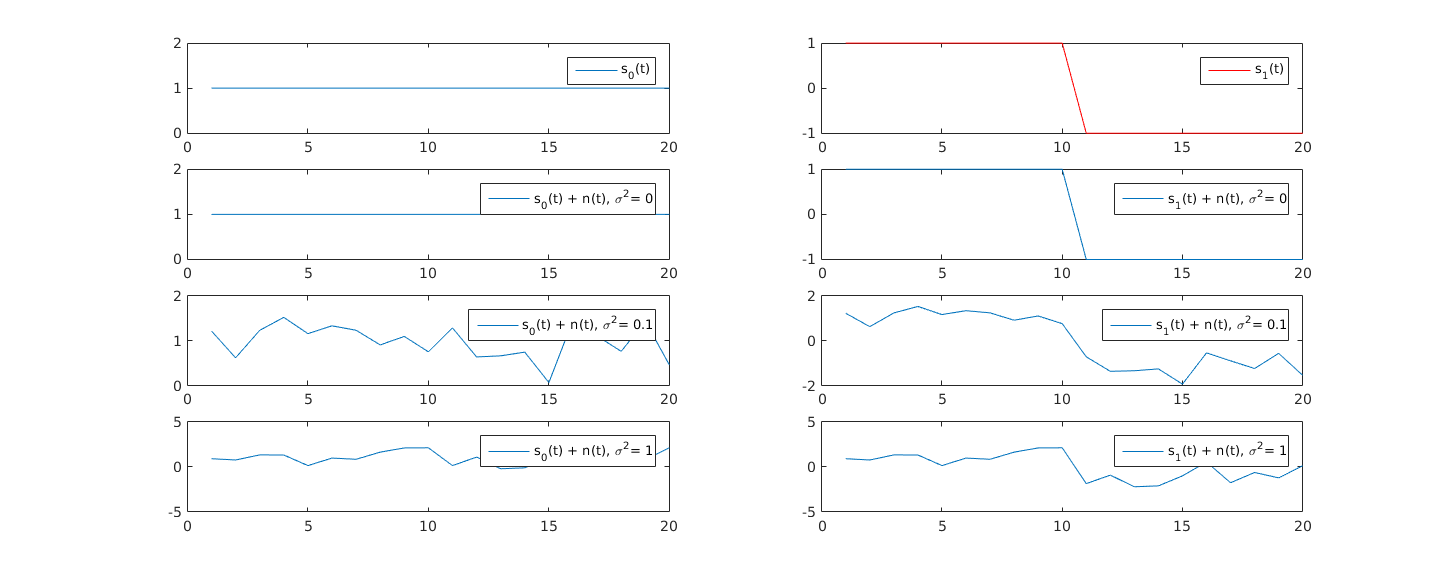

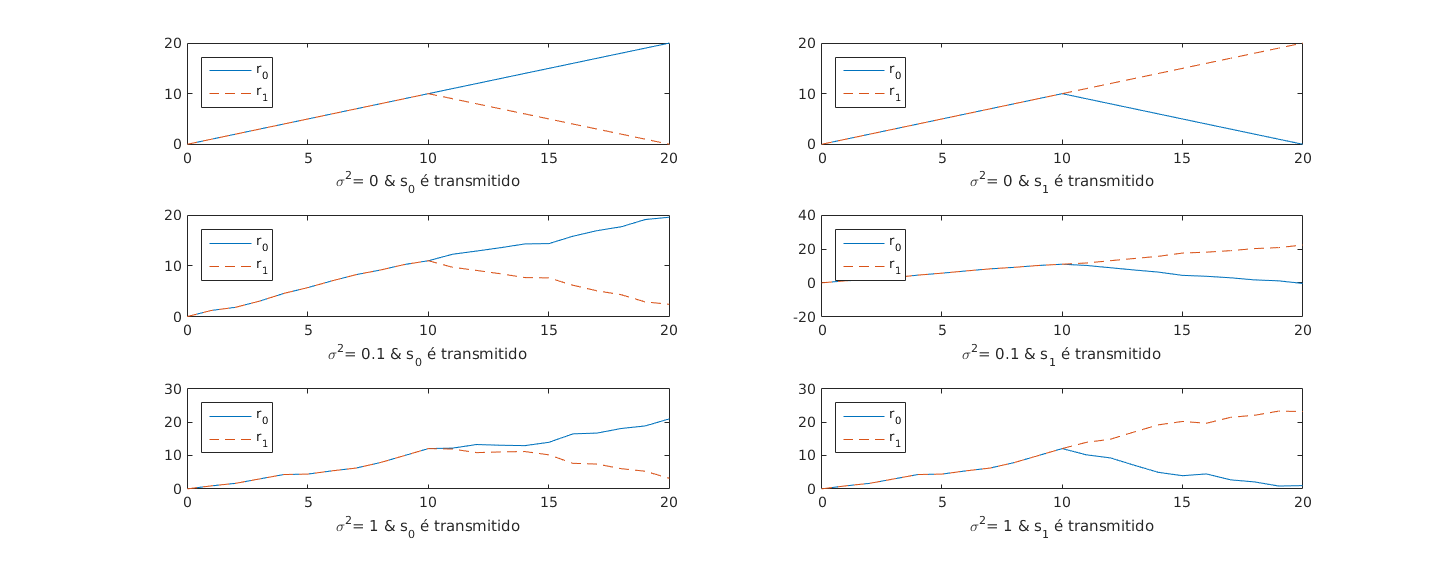

In [1]:
clc;clear all;close all;
%% Parametros
K = 20;                                         % Número de amostras
l = 0 : K;                                      % Eixo amostras
%
% Definindo forma de onda
s_0 = ones(1,K);                                % Sinal 1: Um degrau
s_1 = [ ones(1,K/2), -ones(1,K/2) ];            % Sinal 2: Soma de degraus
%
% Inicializando sinais de saida do correlator
r_0 = zeros(1,K);                               % Inicializa vetor r_0
r_1 = zeros(1,K);                               % Inicializa vetor r_1
vtVar = [0 0.1 1];                              % Variâncias a simular
% Figura para sinais no tempo
fig1 = figure;
fig1.PaperUnits = 'inches';
fig1.PaperPosition = [0 0 15 6];
subplot(length(vtVar)+1, 2, 1 );
plot(1:K,s_0); 
legend('s_0(t)');
subplot(length(vtVar)+1, 2, 2 );
plot(1:K,s_1,'r');
legend('s_1(t)');
% Figura para saídas dos correlatores
fig2 = figure;
fig2.PaperUnits = 'inches';
fig2.PaperPosition = [0 0 15 6];
% Cálculo da saída do correlator para cada valor de variância do ruído
for  ik = 1 : length(vtVar)
    vtNoise = sqrt(vtVar(ik))*randn(1,K);        % Vetor de ruído
    %
    %% Sinais quando s_0 é transmitido
    rs_0 = s_0 + vtNoise;                        % Sinal recebido
    % Correlacionando sinais
    for n = 1 : K
        r_0(n)=sum(rs_0(1:n).*s_0(1:n));
        r_1(n)=sum(rs_0(1:n).*s_1(1:n));
    end
    %% Gráficos 
    %
    % Gráficos da autocorrelação
    figure(fig2);
    subplot( length(vtVar), 2, 2*ik-1 );
    plot(l,[0 r_0],'-');
    hold all;
    plot(l,[0 r_1],'--');
    legend('r_{0}','r_{1}','Location','northwest');
    xlabel(['\sigma^{2}= ' num2str(vtVar(ik)) ' & s_{0} é transmitido'])
    %
    % Gráficos do sinal+ruído no tempo
    figure(fig1);
    subplot(length(vtVar)+1, 2, 2*(ik+1) - 1  );
    plot(1:K,rs_0);
    legend(['s_0(t) + n(t), \sigma^{2}= ' num2str(vtVar(ik))])
    % 
    %% Sinais quando s_1 é transmitido
    rs_1 = s_1 + vtNoise;                         % Sinal recebido
    % Correlacionando sinais
    for n = 1 : K
        r_0(n)=sum(rs_1(1:n).*s_0(1:n));
        r_1(n)=sum(rs_1(1:n).*s_1(1:n));
    end
    %
    %% Gráficos 
    %
    % Gráficos da autocorrelação
    figure(fig2);
    subplot( length(vtVar), 2, 2*ik );
    plot(l,[0 r_0],'-')
    hold all;
    plot(l,[0 r_1],'--')
    legend('r_{0}','r_{1}','Location','northwest');
    xlabel(['\sigma^{2}= ' num2str(vtVar(ik)) ' & s_{1} é transmitido'])
    %
    % Gráficos do sinal+ruído no tempo
    figure(fig1);
    subplot(length(vtVar)+1, 2, 2*(ik+1) );
    plot(1:K,rs_1);
    legend(['s_1(t) + n(t), \sigma^{2}= ' num2str(vtVar(ik))])
    % 
end

### Comentários sobre o código

- Começamos criando os sinais $s_0(t)$ e $s_1(t)$:
>```python
K = 20;                                         
% Definindo forma de onda
s_0 = ones(1,K);                                
s_1 = [ ones(1,K/2), -ones(1,K/2) ];            
```

- Todos os cálculos e gráficos são feitos dentro de um loop que intera no vários valores de variância do ruído $\sigma^2$. As variâncias são definidas no vetor **vtVar** e as amostras de ruído são geradas com potência definida pela variância específica:
>```python
...
vtVar = [0 0.1 1];                              
for  ik = 1 : length(vtVar)
    vtNoise = sqrt(vtVar(ik))*randn(1,K);        
...
end
```

- As saídas dos correlatores são calculadas quando $s_0(t)$ e $s_1(t)$ são, separadamente, os sinais de entrada. Gráficos de r_0 e r_1 para cada caso são mostrados, bem como os sinais ruidosos no tempo.

>```python
for  ik = 1 : length(vtVar)
    ...
    %% Sinais quando s_0 é transmitido
    rs_0 = s_0 + vtNoise;                        
    % Correlacionando sinais
    for n = 1 : K
        r_0(n)=sum(rs_0(1:n).*s_0(1:n));
        r_1(n)=sum(rs_0(1:n).*s_1(1:n));
    end 
    ... 
    %% Sinais quando s_1 é transmitido
    rs_1 = s_1 + vtNoise;                                          
    % Correlacionando sinais
    for n = 1 : K
        r_0(n)=sum(rs_1(1:n).*s_0(1:n));
        r_1(n)=sum(rs_1(1:n).*s_1(1:n));
    end
    ...
end
```

Analisando os gráficos, o sinal no tempo com maior influência do ruído é quando a variância é 1. Visualmente é difícil de distinguir os sinais $s_0(t)$ e $s_1(t)$, olhando para suas formas de onda no tempo. Contudo, ao se observar a saída dos correlatores em $T_b$ ($k$ = 20 amostras), notamos que $r_0 > r_1$, quando o sinal $s_0(t)$ é transmitido (gráficos a esquerda). De forma similar (gráficos a direita), notamos que $r_1 > r_0$, quando o sinal $s_1(t)$ é transmitido. 


Teste outros valores de variância do ruído. Verifique se a conclusão acima continua válida para a variância do ruído igual a um valor maior que os testados. Veja se existe um caso que a conclusão acima não é valida.

## Matched Filter (Filtro casado)

O filtro casado é uma alternativa para o correlator de sinais na demodulação do sinal recebido $r(t)$. Um filtro que é casado com o sinal $s(t)$, em $0\leq t \leq T_{b}$, tem resposta ao impulso igual a:

$$ h(t)= s(T_{b}-t) $$

Consequentemente, o sinal $y(t)$ na saida do filtro casado quando o sinal de entrada é $s(t)$ é dado pela  integral de convolução:


$$  y(t) = \int_{0}^{t} s(\tau)h(t-\tau) d\tau $$


Se substituirmos $ h(t)= s(T_{b}-t) $ na equação anterior, temos: 


$$  y(t) = \int_{0}^{t} s(\tau)s(T_{b}-t+\tau) d\tau$$

e se amostrarmos $y(t)$ em $t= T_{b}$, obtêm-se

$$  y(T_{b}) = \int_{0}^{T_{b}} s^{2}(t)dt=E,$$

sendo $E$ a energia do sinal $s(t)$. Assim, a saída do filtro casado amostrado no instante $T_{b}$ é idêntica à saida do correlator de sinais. 

Em determinadas situações, dependendo da complexidade do formato do pulso $s_{i}(t)$, realizar um filtro casado pode ser uma tarefa bastante complexa. Isso implica dizer que nem sempre seu uso será viável. 

Um último comentário acerca da equivalência entre filtro casado e correlator merece atenção: perceba que o **correlator** calcula a integral do produto do sinal recebido por uma réplica de $s_{i}(t)$, num intervalo de $T_b$ segundos. Em grande parte das aplicações práticas, $s_{i}(t)$ não está confinado num intervalo de $T_b$ segundos, almejando-se compactar o espectro do sinal transmitido. Nestes casos, o correlator poderá proporcionar desempenho inferior ao correspondente filtro casado, pois realizará a integral, que faz parte de sua implementação, em um intervalo menor que a duração do pulso e, por consequência, a amplitude de sua saída não estará associada à energia total do pulso. Em casos como este, a não ser que aceitemos a degradação de desempenho resultante do uso do correlator, somos forçados a implementar o receptor com filtro casado. Vale ainda ressaltar que a diferença de desempenho anteriormente citada pode ser muito pequena a ponto de, em certos casos, poder ser desprezada. Para mais discussões sobre esse assunto consultar:   [Notas de Aula, EE210, Sistemas de Comunicação II, Prof. Dr. Dayan Adionel Guimarães,2012.](http://www.inatel.br/docentes/dayan/easyfolder/EE210/NotasDeAulaEE210.pdf)

# Prática 2: Filtro casado para Sinais Ortogonais

Agora considerando o uso de filtro casado para demodulação ótima, vamos montar um demodulador para os mesmos sinais do exemplo anterior. O receptor é ilustrado na figura a seguir.

![fig_filtrocasado](./FIGS/HD_09/recep_filtrocasado.png)

Calculando a resposta ao impulso para os dois filtros, temos:

$h_{0}=s_{0}(T_{b}-t)$ 

$h_{1}=s_{1}(T_{b}-t)$

A resposta ao impulso dos filtros são ilustradas nas figuras a seguir.

![fig_filtrocasado](./FIGS/HD_09/recep_formas_de_onda.png)

O sinal de saída será amostrado ao completar o tempo $T_b$, no caso, $k=20$ amostras. Podemos calcular que o sinal que será enviado ao decisor $r_{i}(t)$, quando enviado o símbolo $s_{0}$, é:

$$r_{0} = E + n_{0}$$
$$r_{1} = n_{1}$$

Caso o símbolo $s_1(t)$ seja transmitido, podemos escrever:

$$r_{0} = n_{0}$$
$$r_{1} = E + n_{1}$$


Essas saídas são iguais as saídas do corretator.

O experimento a seguir modela esse comportamento, da mesma forma que anteriormente, para vários valores de variância do ruído AWGN.

**Passo 01:** Abra um script no Matlab, salve-o como **handson9_2.m** e escreva o seguinte código:

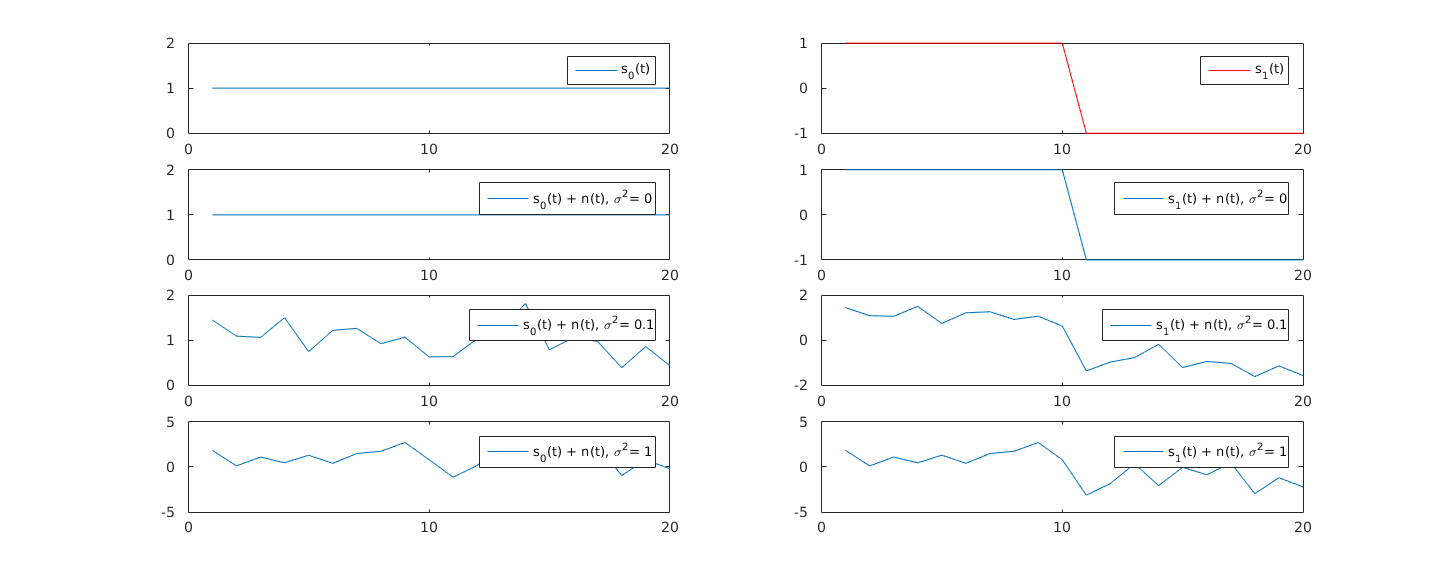

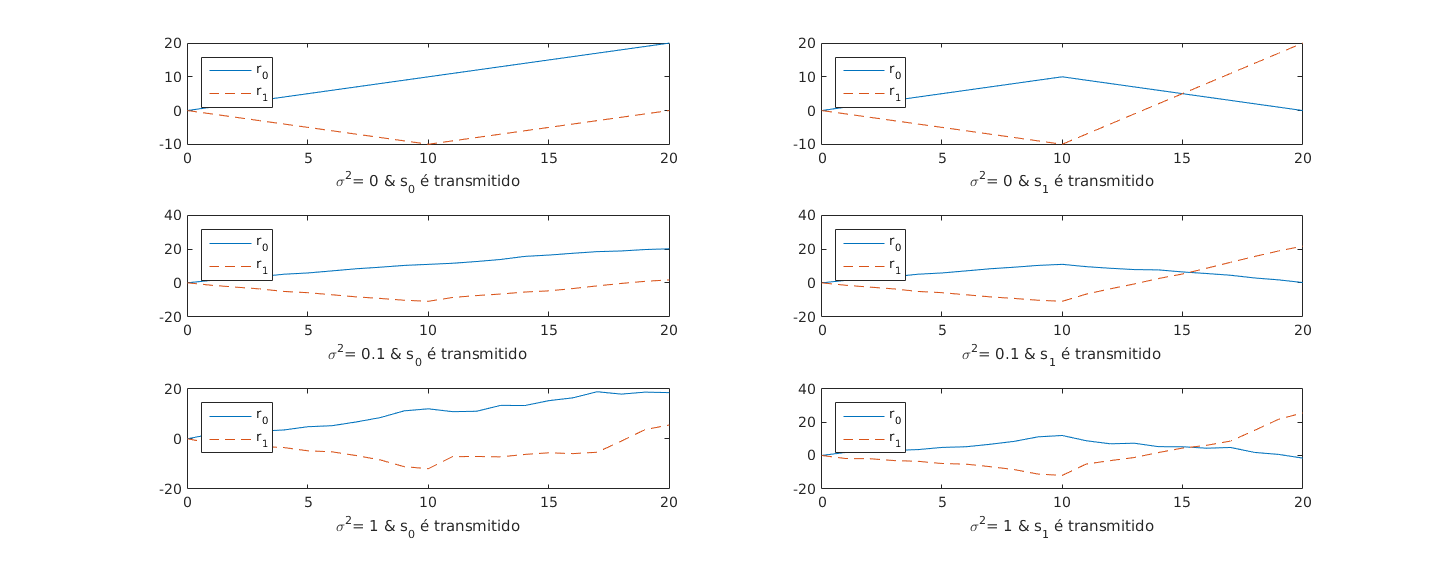

In [2]:
clc;clear all;close all;
%% Parametros
K = 20;                                         % Número de amostras
l = 0 : K;                                      % Eixo amostras
%
% Definindo forma de onda
s_0 = ones(1,K);                                % Sinal 1: Um degrau
s_1 = [ ones(1,K/2), -ones(1,K/2) ];            % Sinal 2: Soma de degraus
%
% Inicializando sinais de saida do correlator
r_0 = zeros(1,K);                               % Inicializa vetor r_0
r_s1 = zeros(1,K);                              % Inicializa vetor r_1
vtVar = [0 0.1 1];                              % Variâncias
% Figura para sinais no tempo
fig1 = figure;
fig1.PaperUnits = 'inches';
fig1.PaperPosition = [0 0 15 6];
subplot(length(vtVar)+1, 2, 1 );
plot(1:K,s_0); 
legend('s_0(t)');
subplot(length(vtVar)+1, 2, 2 );
plot(1:K,s_1,'r');
legend('s_1(t)');
% Figura para saídas dos correlatores
fig2 = figure;
fig2.PaperUnits = 'inches';
fig2.PaperPosition = [0 0 15 6];
%
% Cálculo da saída do correlator para cada valor de variância do ruído
for  ik = 1 : length(vtVar)
    vtNoise = sqrt(vtVar(ik))*randn(1,K);        % Vetor de ruído
    %
    %% Sinais quando s_0 é transmitido
    rs_0 = s_0 + vtNoise;                        % Sinal recebido
    % Filtro Casado
    r_0=conv(rs_0,wrev(s_0));                    % Convolução filtro casado saída 0
    r_0 = r_0(1:ceil(length(r_0)/2));
    r_1=conv(rs_0,wrev(s_1));                    % Convolução filtro casado saída 1
    r_1 = r_1(1:ceil(length(r_1)/2));
    %% Gráficos 
    %
    % Gráficos da autocorrelação
    figure(fig2);
    subplot( length(vtVar), 2, 2*ik-1 );
    plot(l,[0 r_0],'-');
    hold all;
    plot(l,[0 r_1],'--');
    legend('r_{0}','r_{1}','Location','northwest');
    xlabel(['\sigma^{2}= ' num2str(vtVar(ik)) ' & s_{0} é transmitido'])
    %
    % Gráficos do sinal+ruído no tempo
    figure(fig1);
    subplot(length(vtVar)+1, 2, 2*(ik+1) - 1  );
    plot(1:K,rs_0);
    legend(['s_0(t) + n(t), \sigma^{2}= ' num2str(vtVar(ik))])
    % 
    %% Sinais quando s_1 é transmitido
    rs_1 = s_1 + vtNoise;      
    r_0=conv(rs_1,wrev(s_0));                    % Convolução filtro casado saída 0
    r_0 = r_0(1:ceil(length(r_0)/2));
    r_1=conv(rs_1,wrev(s_1));                    % Convolução filtro casado saída 1
    r_1 = r_1(1:ceil(length(r_1)/2));
    %% Gráficos 
    %
    % Gráficos da autocorrelação
    figure(fig2);
    subplot( length(vtVar), 2, 2*ik );
    plot(l,[0 r_0],'-')
    hold all;
    plot(l,[0 r_1],'--')
    legend('r_{0}','r_{1}','Location','northwest');
    xlabel(['\sigma^{2}= ' num2str(vtVar(ik)) ' & s_{1} é transmitido'])
    %
    % Gráficos do sinal+ruído no tempo
    figure(fig1);
    subplot(length(vtVar)+1, 2, 2*(ik+1) );
    plot(1:K,rs_1);
    legend(['s_1(t) + n(t), \sigma^{2}= ' num2str(vtVar(ik))])
    % 
end

### Comentários sobre o código

- Esse experimento é muito parecido com o anterior. A diferença é que o cálculo de $r_0$ e $r_1$ é obtido do filtro casado, via convolução.
>```python
for  ik = 1 : length(vtVar)
    vtNoise = sqrt(vtVar(ik))*randn(1,K);        % Vetor de ruído
    %
    % Sinais quando s_0 é transmitido
    rs_0 = s_0 + vtNoise;                        % Sinal recebido
    % Filtro Casado
    r_0=conv(rs_0,wrev(s_0));                    % Convolução filtro casado saída 0
    r_0 = r_0(1:ceil(length(r_0)/2));
    r_1=conv(rs_0,wrev(s_1));                    % Convolução filtro casado saída 1
    r_1 = r_1(1:ceil(length(r_1)/2));
    %
    ...
    %
    % Sinais quando s_1 é transmitido
    rs_1 = s_1 + vtNoise;      
    r_0=conv(rs_1,wrev(s_0));                    % Convolução filtro casado saída 0
    r_0 = r_0(1:ceil(length(r_0)/2));
    r_1=conv(rs_1,wrev(s_1));                    % Convolução filtro casado saída 1
    r_1 = r_1(1:ceil(length(r_1)/2));
    %
    ...
    %
end
```

O correlator e o filtro casado resultam na maximização da SNR e têm a mesma saída. Contudo, o filtro casado é um simples filtro linear (filtro com resposta ao impulso sendo um versão rebatida da função base), enquanto que o correlator é resultado de uma operação não-linear (mixing) seguida de uma integração. O correlator é mais comum em comunicações analógicas, pois é mais complicado sintetizar um filtro analógico cuja resposta ao impulso tenha formas complexas. Como o número de formas de onda (formatação de pulso digital) de um sistema digital é mais controlada, fica mais fácil projetar o filtro com resposta ao impulso casada com o pulso digital transmitido. Assim, o filtro casado dispensa o mixer, o integrador e a geração do sinal base no receptor.

Com o entendimento do correlator e do filtro casado, a primeira etapa da recepção digital em banda-base está entendida. A seguir algumas considerações e experimentos serão feitos em relação ao detector (segunda etapa da recepção digital).

# Detector

Após a passagem do sinal $r(t)$ pelo correlator ou filtro casado, os valores $r_0$ e $r_1$ são enviados para o detector. O detector é o elemento responsável por decidir se o símbolo recebido $r(t)$ representa o bit $0$ ou $1$. O detector ótimo é definido para minimizar a taxa de erro. Seu funcionamento é bastante simples e está fora do escopo desse experimento provar que esse é a maneira ótima em relação a BER. Na verdade, independente de prova matemática, considerando símbolos equiprováveis sendo transmitidos, é bastante intuitivo entender que a melhor regra é:

**Regra de decisão**:
> Se $r_{0} > r_{1} \Rightarrow  s_{0}(t)$, i.e., sinal recebido é mais correlacionado com  $s_{0}(t)$;

> Se $r_{0} < r_{1}  \Rightarrow  s_{1}(t)$, i.e., sinal recebido é mais correlacionado com  $s_{1}(t)$. 

Do ponto de vista de um detector, o **erro** significa:

> Se $r_{0}< r_{1}$, quando $s_{0}$ é transmitido $\left \{\begin{align*} r_{0} &= E + n_{0} \\  r_{1} &= n_{1}\end{align*}\right.$ 

> Se $r_{0}> r_{1}$, quando $s_{1}$ é transmitido $\left\{\begin{align*} r_{0} &= n_{0} \\ r_{1}&= E+ n_{1} \end{align*}\right.$ 

Outra interpretação para o erro é que ruído pode atuar tão negativamente em um sinal que pode torná-lo mais correlacionado com o outro, causando erro na detecção.

Em termos estatísticos, a probabilidade de ocorrência de erro quando $s_{0}$ é transmitido é dada por:

$$ P(e|s_{0})=P((r_{0}<r_{1})|s_{0})=P((n_{0}+E<n_{1})|s_{0})=P((n_{1}-n_{0}>E)|s_{0})$$

Similarmente, para $s_{1}$:

$$ P(e|s_{1})=P((r_{0}>r_{1})|s_{1})=P((n_{0}>E+n_{1})|s_{1})=P((n_{0}-n_{1}>E)|s_{1})$$

Podemos, a partir da equação acima, chegar na equação da probabilidade de erro, como:

$$P_{e} = P(e|s_{1}) + P(e|s_{0})$$

$$ P_{e}=\frac{1}{\sqrt{2\pi}\sigma_{x} } \int_{E}^{\infty} e^{\frac{-x^{2}}{2\sigma_{x}^{2}}} dx $$

 
$$P_{e} = Q\left (  \sqrt{\frac{E}{N_{0}}} \right ),$$

sendo $Q(x) = \frac{1}{2}erfc\left(\frac{x}{\sqrt{2}}\right)$ a função Q. 

>**Nota:** A função erro erf(x) tem uma longa história que começa com os artigos de De Moivre (1718−1733) e Laplace (1774). Mais tarde, Kramp (1799) utilizou esta integral para a definição da função de erro complementar erfc(x) = 1- erf(x).

O detalhamento matemático de $P_e$ pode ser encontrado no livro do [Proakis](http://shannon.ir/Bookme/Contemporary%20Communication%20Systems%20Using%20MATLAB.pdf) (Pág 194), portanto,  nos deteremos apenas ao resultado. Geralmente, experimentos envolvendo a transmissão de bits (simulação de enlace) são modeladas de forma a se calcular uma taxa de bits errados (BER), a qual, na verdade, é uma estimativa da $P_e$.

# Prática 3: Variação do sinal na entrada do detector com sinais ortogonais

Outra maneira de ver o que está acontecendo é analisar o sinal que entra no detector e sua variação. Esse é o objetivo dessa prática.

Caso $s_0(t)$ seja transmitido, temos:

**Saída referente a correlação com $s_{0}$(t) em $T_b$:**
$$ r_{0}= E + \int_{0}^{T_{b}} n(t)s_{0}(t)dt  $$

$$r_{0}= E+n_{0} $$

Com $n_0 = \int_{0}^{T_{b}} n(t)s_{0}(t)dt $.

**Saída referente a correlação com $s_{1}$(t) em $T_b$:**
$$ r_{1}=\int_{0}^{T_{b}} s_{0}(t)s_{1}(t)dt + \int_{0}^{T_{b}} n(t)s_{1}(t)dt  $$
$$ r_{1}= n_{1} $$

Com $n_1 = \int_{0}^{T_{b}} n(t)s_{1}(t)dt $.

Assim, as saídas $r_0$ e $r_1$ variam em amplitude dependendo do ruído AWGN $n(t)$. Como já explicado no [Hands-on 08: Ruído AWGN (caracterização e geração de amostras)](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004/blob/master/h08.ipynb), a $E_b/N_0$ é um parâmetro de entrada muito usado para caracterizar a qualidade de um enlace de comunicação. Ela serve como uma maneira de melhor parametrizar a potência do ruído em uma simulação. Portanto, para um nível de $E_b/N_0$ especificado, teremos as amplitudes de $n_0$ e $n_1$ caracterizadas por variáveis aleatórias com distribuição Gaussiana (ruído AWGN) com média zero e variância que depende da $E_b/N_0$. Então, sendo $n(t)$ um ruído AWGN com potência espectral igual a $\frac{N_0}{2}$ (padronização), podemos calcular:


**Para $r_{0}= E+n_{0} $:**

$$E[r_0] = E + E[n_0] = E$$

$$\sigma^2 = E[{n_0}^{2}] =  \int_0^{T_b}\int_0^{T_b} s_0(t)s_0(\tau)E[n(t)n(\tau)]dtd\tau = \frac{N_0}{2}\int_0^{T_b}\int_0^{T_b} s_0(t)s_0(\tau)\delta(t - \tau)dtd\tau = \frac{N_0}{2}\int_0^{T_b}{s_0}^{2}(t)dt = \frac{EN_0}{2}$$

**Para $r_{1}= n_{1} $:**

$$E[r_1] = E[n_1] = 0$$

$$\sigma^2 = E[{n_1}^{2}] = \frac{EN_0}{2}$$


Assim, podemos escrever a distribuição de $r_1$ e $r_0$, quando $s_0(t)$ foi transmistido, como:

$p(r_{0}|s_{0}) = \frac{1}{\sqrt{2\pi}\sigma}\cdot e^{\frac{-(r_{0}-E)^2}{2\sigma^{2}}}$, PDF Gaussiana de $\mu = E$ e $\sigma^2 = \frac{EN_0}{2}$

$p(r_{1}|s_{0})= \frac{1}{\sqrt{2\pi}\sigma}\cdot e^{\frac{-r_{1}^2}{2\sigma^{2}}}$, PDF Gaussiana de $\mu = 0$ e $\sigma^2 = \frac{EN_0}{2}$

O experimento a seguir mostra a variação da saída do correlator graficamente para alguns valores de $E_b/N_0$.

**Passo 01:** Abra um script no Matlab, salve-o como **handson9_3.m** e escreva o seguinte código:

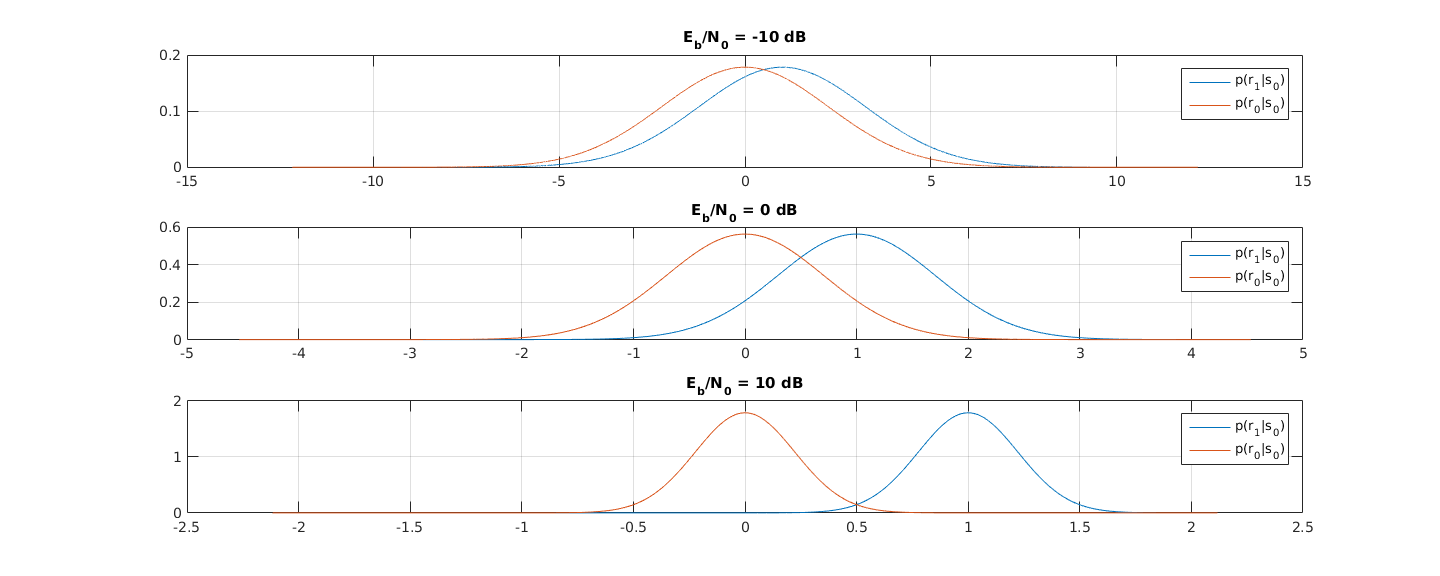

In [4]:
clc;clear all;close all;
%% Parâmetros
Eb = 1;                            % Energia dos pulsos (normalizada para 1)
Er0 = Eb;                          % Média da saída do correlator 0
Er1 = 0;                           % Média da saída do correlator 1
vtEbN0_dB = [-10 0 10];            % Eb/N0s a simular em dB
vtEbN0 = 10.^(vtEbN0_dB/10);       % Eb/N0s a simular em linear
vtVar = Eb*Eb./vtEbN0/2;           % Variância na entrada do detector (= EN0/2)
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 15 6];
for ik = 1 : length(vtEbN0_dB)
    dStd = sqrt(vtVar(ik));
    x=-5*dStd-Eb:0.001:5*dStd+Eb;  % Eixo (5*variância)
    %% Cálculo da distribuição Gausiana
    vtr_0 = normpdf(x,Er0,dStd);   % Valores de r0 (distribuição de probalilidade r0|s0)
    vtr_1 = normpdf(x,Er1,dStd);   % Valores de r1 (distribuição de probalilidade r1|s0)
    %% Gráficos
    %
    subplot(length(vtEbN0_dB),1,ik)
    plot(x,vtr_0,x,vtr_1);
    title(['E_b/N_0 = ' num2str(vtEbN0_dB(ik)) ' dB']);
    legend('p(r_{1}|s_0)','p(r_{0}|s_0)');
    grid;
end

### Comentários sobre o código

- O principal parâmetro desse experimento é o vetor com valores de $E_b/N_0$ a simular (**vtEbN0_dB**). Esse vetor é escrito em dB e depois convertido para escala linear. Seus valores servem para determinar o variância e o desvio  padrão do ruído para calcular $r_0$ e $r_1$. As médias de $r_0$ e $r_1$ também são definidas no começo do código.

>```python
Eb = 1;                            % Energia dos pulsos (normalizada para 1)
Er0 = Eb;                          % Média da saída do correlator 0
Er1 = 0;
vtEbN0_dB = [-10 0 10];            % Eb/N0s a simular em dB
vtEbN0 = 10.^(vtEbN0_dB/10);       % Eb/N0s a simular em linear
vtVar = Eb*Eb./vtEbN0/2;           % Variância na entrada do detector (= EN0/2)
...
for ik = 1 : length(vtEbN0_dB)
    ...
    dVar = vtVar(ik);
    x=-5*dVar-Eb:0.001:5*dVar+Eb;  % Eixo (5*variância)
    %% Cálculo da distribuição Gausiana
    vtr_0 = normpdf(x,Er0,dVar);   % Valores de r0 (distribuição de probalilidade r0|s0)
    vtr_1 = normpdf(x,Er1,dVar);   % Valores de r1 (distribuição de probalilidade r1|s0)
    ...
end
```

Podemos perceber que, conforme a variância do ruído é maior (menor $E_b/N_0$), mais largo será a distribuição de valores de $r_1$ e $r_0$ (i.e. suas PDFs). Isso também proporcionará maior probabilidade de erro, pois terão mais valores em que $r_1 > r_0$, mesmo transmitindo $s_0(t)$. Graficamente essa probabilidade de erro é vista na região de intersecção entre as duas PDFs. Veja que no caso de $E_b/N_0 = 10 $ dB, essa região é bem menor que nos outros casos.

# Prática 4: Curva $P_e$ teórica vs $E_b/N_0$

Uma maneira muito tradicional (e funcional) de mostrar o desempenho de um enlace de comunicação é por meio da curva $P_e$ teórica vs $E_b/N_0$, geralmente com $Pe$ em escala logarítmica e $E_b/N_0$ em dB. Ela serve para comparar o desempenho de diferentes modulações bem como a análise de valor agregado de codificadores de canal e estratégias de multiplexação, por exemplo.

Ao longo dos anos, pesquisadores calcularam e disponibilizaram em artigos e livros a formulação da $P_e$ para várias configurações de enlaces digitais. Esse experimento mostra o desempenho da modulação BPSK em canais AWGN. Outros hands-ons serão dedicados a outros tipos de canais.

**Passo 01:** Abra um script no Matlab, salve-o como **handson9_4.m** e escreva o seguinte código:

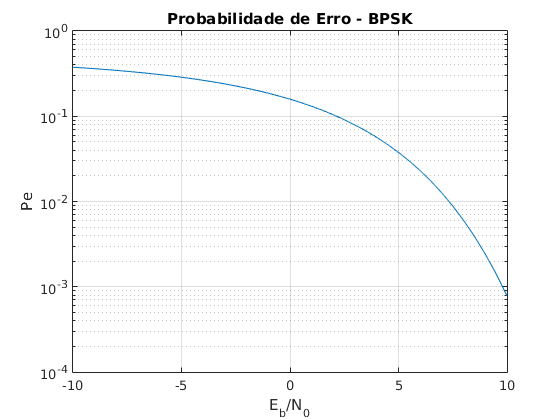

In [5]:
clc;clear all;close all;
%% Parâmetros
vtEbN0_dB = [-10:0.5:10];                        % Vetor de Eb/N0 a simular
vtEbN0 = 10.^(vtEbN0_dB/10);
vtPe = qfunc(sqrt(vtEbN0));
semilogy(vtEbN0_dB,vtPe);
title('Probabilidade de Erro - BPSK');
xlabel('E_b/N_0');
ylabel('Pe');
grid;

### Comentários sobre o código

- O código é bem simples e o principal parâmetro desse experimento é o vetor com valores de $E_b/N_0$ a simular (**vtEbN0_dB**). Esse vetor é escrito em dB e depois convertido para escala linear. Seus valores servem para determinar a Pe diretamente pela fórmula mostrada anteriormente: $P_{e} = Q\left (  \sqrt{\frac{E}{N_{0}}} \right )$.
>```python
vtEbN0_dB = [-10:0.5:10];                        % Vetor de Eb/N0 a simular
vtEbN0 = 10.^(vtEbN0_dB/10);
vtPe = qfunc(sqrt(vtEbN0));
```

- Como mencionado anteriormente, a curva $P_e$ teórica vs $E_b/N_0$, geralmente é construída com $Pe$ em escala logarítmica e $E_b/N_0$ em dB. Para tal, usamos a função **semilogy**.

>```python
semilogy(vtEbN0_dB,vtPe);
```

Analisando tecnicamente a figura do experimento podemos concluir que quanto maior a $E_b/N_0$, menor é a probabilidade de errar um bit, evidenciando categoricamente o que foi exposto no experimento anterior.

Uma $E_b/N_0$ grande significa maior nível de energia (por consequência de potência transmitida) ou menor nível de ruído. Contudo, nesse e nos demais experimentos, estamos normalizando $E_b$ = 1. Assim, quanto maior a $E_b/N_0$, menor o nível de ruído inserido pelo canal de comunicação e os dispositivos transceptores.

# Prática 5: Simulação de Monte Carlo de um enlace de comunicação digital para sinais ortogonais

A simulação de Monte Carlo de um enlace de comunicação digital consiste em estimar a probabilidade de erro de bit $P_e$ a partir da taxa de erro de bits (BER). Em uma simulação de Monte Carlo, bits são transmitidos modelando os blocos da cadeia de transmissão digital. A recepção envolve, pelo menos, um modelo para o correlator (ou filtro casado) e para o detector. Assim, ao final de vários experimentos de Monte Carlo, é possível calcular a BER como:

$$BER = \frac{n_{err}}{n_{bits}},$$

sendo $n_{err}$ a quantidade de bits errados na saída do detector em um conjunto de $n_{bits}$ transmitidos.

As modelagens do transmissor, do receptor e do canal podem ser as mais precisas quanto o programador desejar. Contudo, existe um crompomisso entre precisão do modelo e o tempo de simulação exigido. Quanto mais elaborado o modelo, mas aparatos matemáticos (e modelos estoscásticos) serão exigidos, por isso a maior exigência de poder computacional. Na verdade, qualquer simulador pode ser visto como um conjunto de processos determinísticos e estocásticos que almejam modelar um comportamento do mundo real.

Para termos uma ideia, algumas campanhas de simulação demoram semanas, ou até meses, para terminarem e nos proporcionar dados estatisticamente confiáveis. 

Considerando o tempo e a simplicidade que precisamos para um experimento factível em sala de aula, faremos a modelagem de um sistema digital BPSK sujeito a um canal AWGN. Inicialmente, não construiremos a forma de onda do sinal e só representaremos sua energia. Assim, os modelos do transmissor e do receptor são extremamente simplificados, como ilustra a figura a seguir.

![fig_filtrocasado](./FIGS/HD_09/sim_orto.png)

**O Transmissor**

Modelaremos o transmissor como um vetor de bits aleatórios que simbolizará o sinal transmitido.  A geração de bits precisa garantir que 0's e 1's serão gerados com mesma probabilidade. Devido ao modelo simples do transmissor, não realizaremos o processo de modulação em banda-base. Na verdade, não faremos explicitamente o processo de modulação em banda-base, nem mesmo a formatação de pulsos para expressar a largura (temporal e de banda) do sinal transmitido. Contudo, consideraremos que o sinal transmitido que representa cada bit tem energia $E_b = E = 1$.

**O Canal**

O canal será modelado como um ruído AWGN. Utilizaremos um vetor de $E_b/N_0$s para variar a potência do ruído e avaliar o desempenho do enlace da mesma forma que fizemos na prática anterior. Na verdade, estamos interessados em mostrar graficamente duas curvas:

1) A curva $P_e$ teórica vs $E_b/N_0$; e

2) A curva $BER$ simulada vs $E_b/N_0$.


**O Receptor**

Como visto anteriormente, a saída do filtro casado pode ser calculado da seguinte forma:

>  Se $s_{0}$ é transmitido $\left \{\begin{align*} r_{0} &= E + n_{0} \\  r_{1} &= n_{1}\end{align*}\right.$ 

>  Se $s_{1}$ é transmitido $\left\{\begin{align*} r_{0} &= n_{0} \\ r_{1} &= E+ n_{1} \end{align*}\right.$ 

Assim, para modelar a recepção iremos calcular $r_0$ e $r_1$ para cada bit transmitido. Na verdade, a cada bit transmitido, será gerado um sinal $r(t)$ e, por meio dele, $r_0$ e $r_1$ é calculado. Isso encerra a modelagem do correlator (ou do filtro casado).

De posse de $r_0$ e $r_1$ para cada bit transmitido, o detector é modelado como:

> Se $r_{0} > r_{1} \Rightarrow  s_{0}(t)$, i.e., sinal recebido é mais correlacionado com  $s_{0}(t)$ e se decide pelo bit 0;

> Se $r_{0} < r_{1}  \Rightarrow  s_{1}(t)$, i.e., sinal recebido é mais correlacionado com  $s_{1}(t)$ e se decide pelo bit 1.

Ao final temos uma sequência de bits detectados.

Veja que não foi necessário modelar o processo de demodulação, pois a modulação não foi modelada. Isso será alvo de outros experimentos. 

**Cálculo da BER**

De posse da sequência de bits transmistidos e de bits detectados, fazemos a contagem dos bits diferentes nos dois vetores, calculando $n_{err}$. Outro parâmetro de entrada muito importante é o número de bits transmitidos $n_{bits}$. Ele definirá o tempo de simulação e também terá suma importância na qualidade da estimação da BER. Finalmente, a $BER$ é calculada como:

$$BER = \frac{n_{err}}{n_{bits}}.$$


O experimento a seguir traz a modelagem descrita acima e realiza uma campanha de simulação em que variamos o número total de bits. 

**Passo 01:** Abra um script no Matlab, salve-o como **simOrtogonal.m** e escreva o seguinte código. Salve esse script na pasta que se encontra o arquivo **h09.ipynb** (este arquivo). Na verdade, esse arquivo **.m** não é um script, mas uma função do Matlab que será chamada posteriormente pelo código principal do simulador.

In [ ]:
function [dBER] = simOrtogonal(EbN0_dB,nMCSamples)
% Simula a BER para sinais ortogonais para uma dada Eb/N0 em dB
%
% Parâmetros de Entrada:
%
%  EbN0_dB: Eb/N0, considerando Eb = 1
%  nMCSamples: número de bits transmitidos para estimar a BER
%
% Saídas
% 
%  dBER: BER estimada
%
% Essa função deve ser salva com o nome simOrtogonal.m na mesma pasta 
% do arquivo h09.ipynb
%
% Exemplo de uso: [dBER] = simOrtogonal(10,1e5)

% Parâmetros
dE = 1;                           % Energia do sinal s0 e s1
dEbN0 = 10^(EbN0_dB/10);          % Eb/No em escala linear
dsgma = dE/sqrt(2*dEbN0);         % Desvio padrão do ruído
%
%% Transmissão
% Geração dos números binários 0 e 1 com igual probabilidade
vtBin = randi([0 1],1,nMCSamples);
% Acha os índice de bits iguais a 0
vtIndex0 = find(vtBin == 0);
% Acha os índice de buts iguais a 1
vtIndex1 = find(vtBin == 1);
%
%% Recepção e detecção de erro
% Gera saída do correlator para cada transmissão de s0
vtro(vtIndex0) = dE + dsgma*randn(1,length(vtIndex0));
vtr1(vtIndex0) = dsgma*randn(1,length(vtIndex0));
% Gera saída do correlator para cada transmissão de s1
vtro(vtIndex1) = dsgma*randn(1,length(vtIndex1));
vtr1(vtIndex1) = dE + dsgma*randn(1,length(vtIndex1));
% Detecção: 0 se, r0>r1; e 1, se r0<r1
vtBinDetec = vtro < vtr1;
%
% Detecção de erros (soma dos vetores originais e detectados)
% 0 + 0 = 0 (acerto)
% 1 + 1 = 2 (acerto)
% 0 + 1 = 1 (erro)
% 1 + 0 = 1 (erro)
vtError = vtBin + vtBinDetec; 
nErrors = length(find(vtError == 1));
% Cálculo da BER
dBER = nErrors/nMCSamples;

**Passo 02:** Abra um script no Matlab, salve-o como **handson9_5.m** e escreva o seguinte código. Esse é o corpo principal da campanha de simulação. Ele chamará a função **simOrtogonal.m** (corpo do simulador) várias vezes, com parâmetros de entrada diferentes e montará a curva $BER$ vs $E_b/N_0$ e a curva a curva $P_e$ teórica vs $E_b/N_0$ em um mesmo gráfico.

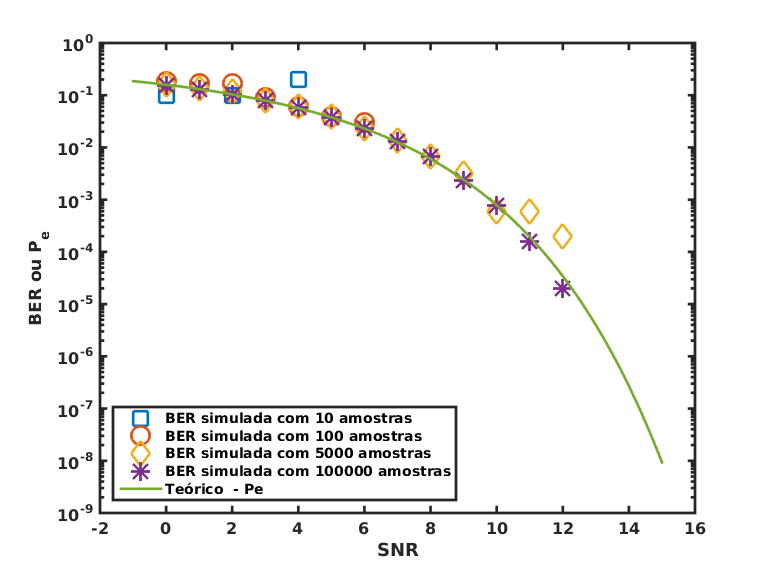

In [1]:
% Script do Matlab para simulação (e comparação com fórmula teórica) de
% transmissão sinais ortogonais
clear all;close all;clc;
%% Parâmetros
vtEbNoSim = 0:1:15;                   % Valores de Eb/No a serem simulados (dB)
vtEbNoTeo = -1:0.1:15;                % Valores de Eb/No para a curva teórica (dB)
vtnMCSamples = [10 100 5000 100000];  % Número de amostras de Monte Carlo a serem simuladas
vtMarkers = ['s';'o';'d';'*';'<'];    % Marcadores dos gráricos (para diferenciar a legenda)
chLegend = [];                        % Iniciar vetor de legendas
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 8 6];
for is = 1:length(vtnMCSamples)
    nMCSamples = vtnMCSamples(is);
    % Gera a curva BER vs Eb/No por meio do simulador simOrtogonal
    for ik=1:length(vtEbNoSim),
        vtSimError(ik)= simOrtogonal( vtEbNoSim(ik), nMCSamples );
    end
    % plota gráfico
    hand1 = semilogy(vtEbNoSim,vtSimError, vtMarkers(is));
    clear vtSimError;
    hold all;
    % Configura marcadores
    set(hand1, 'linewidth', 2, 'markersize',14);
    % Monta legenda
    chLegend = [chLegend;{['BER simulada com ' num2str(nMCSamples) ' amostras']}];
end
% Gera a curva Pe teórica vs Eb/No por meio do formulação
vtSNR = 10.^(vtEbNoTeo/10);
vtTeoError = qfunc(sqrt(vtSNR));
chLegend = [chLegend; {['Teórico  - Pe']}];
hand1 = semilogy(vtEbNoTeo,vtTeoError);
set(hand1, 'linewidth', 2)
legend(chLegend,'Location','southwest');
% Configura linha e fonte do gráfico
set(gca,'linewidth',2,'fontsize',12,'fontweight','bold');
xlabel('SNR');
ylabel('BER ou P_e');

### Comentários sobre o código da campanha de simulação

- Similar ao que vínhamos fazendo, o vetor de $E_b/N_0$ a simular é um parâmetro muito importante. Aqui definimos dois vetores: (i) **vtEbNoSim**, para os valores a serem simulados via Monte Carlo; e (ii) **vtEbNoTeo**, para os valores de Eb/No para a curva teórica. A existência de dois vetores se justifica pela maior necessidade de poder computacional necessário para simulação de Monte Carlo. Assim, optamos por simular menor pontos (valores de $E_b/N_0$)  do que os usados para montar a curva teórica.
>```python
vtEbNoSim = 0:1:15;                   % Valores de Eb/No a serem simulados (dB)
vtEbNoTeo = -1:0.1:15;                % Valores de Eb/No para a curva teórica (dB)
```

- Outro parâmetro importante é o número de eventos de Monte Carlo (bits transmitidos) a serem simulados para estimar a BER. Nesse simulação definimos um vetor de número de amostras de Monte Carlo a serem simulados. Assim, podemos comparar qual a influência desse parâmetro na estimação da BER.
>```python
vtnMCSamples = [10 100 5000 100000];  % Número de amostras de Monte Carlo a serem simuladas
```

- Com as definições acima, o script da campanha de simulação chama a função **simOrtogonal.m** para cada valor de $E_b/N_0$ do vetor **vtEbNoSim** e de número de amostras do vetor **vtnMCSamples**. O gráfico correspondente é feito em cada iteração desse laço. 
>```python
vtEbNoSim = 0:1:15;                   % Valores de Eb/No a serem simulados (dB)
vtnMCSamples = [10 100 5000 100000];  % Número de amostras de Monte Carlo a serem simuladas
...
for is = 1:length(vtnMCSamples)
    nMCSamples = vtnMCSamples(is);
    % Gera a curva BER vs Eb/No por meio do simulador simOrtogonal
    for ik=1:length(vtEbNoSim),
        vtSimError(ik)= simOrtogonal( vtEbNoSim(ik), nMCSamples );
    end
...
end
```
- O script da campanha de simulação também chama a função Q($\cdot$) para cada valor de $E_b/N_0$ do vetor **vtEbNoTeo**. O cálculo e gráfico correspondente é feito sem a necessidade de laço.
>```python
vtEbNoTeo = -1:0.1:15;                % Valores de Eb/No para a curva teórica (dB)
vtSNR = 10.^(vtEbNoTeo/10);
vtTeoError = qfunc(sqrt(vtSNR));
```
- A demais partes do código são para construção dos gráficos.

### Comentários sobre o código da função **simOrtogonal.**

- Como se trata de uma função, o prototípo deve seguir as regras do Matlab. O protótipo da função começa com as variáveis de saídas (dBER), seguida do nome da função (simOrtogonal, que deve ser o mesmo nome do arquivo .m), finalizando com as variáveis de entrada (EbN0_dB, nMCSamples). O que vier comentado depois do protótipo da função define uma mensagem de _help_ associada a função.
>```python
function [dBER] = simOrtogonal(EbN0_dB,nMCSamples)
% Simula a BER para sinais ortogonais para uma dada Eb/N0 em dB
%
% Parâmetros de Entrada:
%
%  EbN0_dB: Eb/N0, considerando Eb = 1
%  nMCSamples: número de bits transmitidos para estimar a BER
%
% Saídas
% 
%  dBER: BER estimada
%
% Essa função deve ser salva com o nome simOrtogonal.m na mesma pasta 
% do arquivo h09.ipynb
%
% Exemplo de uso: [dBER] = simOrtogonal(10,1e5)
```

- O _help_ da função pode ser acessado com o comando **help**:

In [2]:
help simOrtogonal

  Simula a BER para sinais ortogonais para uma dada Eb/N0 em dB
 
  Parâmetros de Entrada:
 
   EbN0_dB: Eb/N0, considerando Eb = 1
   nMCSamples: número de bits transmitidos para estimar a BER
 
  Saídas
  
   dBER: BER estimada
 
  Essa função deve ser salva com o nome simOrtogonal.m na mesma pasta 
  do arquivo h09.ipynb
 
  Exemplo de uso: [dBER] = simOrtogonal(10,1e5)



- Como já mencionado, modelamos o transmissor como um vetor de bits aleatórios que simbolizam o sinal transmitido.  A geração de bits precisa garantir que 0's e 1's serão gerados com mesma probabilidade, para isso usamos a função **randi** (distribuição uniforme de números inteiros). Armazenamos em **vtIndex0** os índices dos símbolos transmitidos iguais a 0, e em **vtIndex1** os índices dos símbolos transmitidos iguais a 1. Chamamos de índice a posição de cada elemento em um vetor. Isso servirá para separar todos os cálculos envolvendo tais bits.
>```python
function [dBER] = simOrtogonal(EbN0_dB,nMCSamples)
...
%% Transmissão
% Geração dos números binários 0 e 1 com igual probabilidade
vtBin = randi([0 1],1,nMCSamples);
% Acha os índice de bits iguais a 0
vtIndex0 = find(vtBin == 0);
% Acha os índice de buts iguais a 1
vtIndex1 = find(vtBin == 1);
...
%
```
- O canal foi modelado como um ruído AWGN, utilizando a $E_b/N_0$s para definir a potência do ruído. Cada chamada desse função corresponde a um ponto da curva $BER$ simulada vs  Eb/N0. Como estamos fazendo uma modelagem simples, já geramos diretamente a saída do correlator $r_0$ (**vtro**) e $r_1$ (**vtr1**) em função do ruído AWGN. Observe que a geração desses vetores estão indexadas por **vtIndex0** e **vtIndex1**, objetivando fazer os cálculos separadamente quando $s_0(t)$ ou $s_1(t)$ seja transmitido. Como visto anteriormente, a saída do filtro casado pode ser calculado da seguinte forma:

> Se $s_{0}$ é transmitido $\left \{\begin{align*} r_{0} &= E + n_{0} \\  r_{1} &= n_{1}\end{align*}\right.$ 

> Se $s_{1}$ é transmitido $\left\{\begin{align*} r_{0} &= n_{0} \\ r_{1} &= E+ n_{1} \end{align*}\right.$ 

O código implementa exatamente essa saída.

>```python
function [dBER] = simOrtogonal(EbN0_dB,nMCSamples)
...
dE = 1;                           % Energia do sinal s0 e s1
dEbN0 = 10^(EbN0_dB/10);          % Eb/No em escala linear
dsgma = dE/sqrt(2*dEbN0);         % Desvio padrão do ruído
...
%
%% Recepção e detecção de erro
% Gera saída do correlator para cada transmissão de s0
vtro(vtIndex0) = dE + dsgma*randn(1,length(vtIndex0));
vtr1(vtIndex0) = dsgma*randn(1,length(vtIndex0));
% Gera saída do correlator para cada transmissão de s1
vtro(vtIndex1) = dsgma*randn(1,length(vtIndex1));
vtr1(vtIndex1) = dE + dsgma*randn(1,length(vtIndex1));
```

- Já na deteção, de posse de $r_0$ e $r_1$ para cada bit transmitido, o código implementa:

> Se $(r_{0} > r_{1}) \Rightarrow  s_{0}(t)$, i.e., sinal recebido é mais correlacionado com  $s_{0}(t)$ e se decide pelo bit 0;

> Se $(r_{0} < r_{1})  \Rightarrow  s_{1}(t)$, i.e., sinal recebido é mais correlacionado com  $s_{1}(t)$ e se decide pelo bit 1.

Ao final temos uma sequência de bits detectados. Veja que é muito conveniente fazer essa operação em Matlab e em um vetor binário. A operação **(vtro < vtr1)** gera um vetor com 1s (verdade) nas posições que os elementos dos vetores forem vtro < vtr1, e zero nas demais posições.
>```python
function [dBER] = simOrtogonal(EbN0_dB,nMCSamples)
...
% Detecção: 0 se, r0>r1; e 1, se r0<r1
vtBinDetec = vtro < vtr1;
...
```

- De posse da sequência de bits transmistidos e de bits detectados, fazemos a contagem dos bits diferentes nos dois vetores, calculando $n_{err}$. Para calcular a BER é só dividir esse valor pelo número de bits transmitidos. Os vetores de bits transmistidos e de bits detectados são somados e a seguinte regra é aplicada:

> Resultado da soma = 0 + 0 = 0 (acerto)

> Resultado da soma = 1 + 1 = 2 (acerto)

> Resultado da soma = 0 + 1 = 1 (erro)

> Resultado da soma = 1 + 0 = 1 (erro)

Assim, precisamos contar o número de 1s do vetor soma. O código fica:

>```python
function [dBER] = simOrtogonal(EbN0_dB,nMCSamples)
...
vtError = vtBin + vtBinDetec; 
nErrors = length(find(vtError == 1));
% Cálculo da BER
dBER = nErrors/nMCSamples;
```

Como análise de desempenho, podemos observar alguns pontos interessantes no gráfico desse experimento:

1) Como esperado, tanto na **curva $P_e$ teórica vs  Eb/N0** como na **curva $BER$ simulada vs Eb/N0**, a BER e a $P_e$ são menores quanto maior for a $E_b/N_0$;

2) Contudo, para valores baixos de $n_{bits}$ definido em **nMCSamples**, não existe uma boa convergência entre BER e a $P_e$ teórica. Esse resultado vem diretamente da **Lei Forte dos Grandes Números**, apresentada no [Handson 07: Caracterização de variáveis aleatórias (PDF e CDF), Metodologia de Monte Carlo e Teorema Central do Limite](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004/blob/master/h07.ipynb). Para termos uma boa estimativa de $P_e$ via BER precisamos de um número grande experimentos de Monte Carlo (de bits). 

Vamos tomar um exemplo da estimação da Pe para $E_b/N_0 = 15$. Podemos calcular a Pe como:

$$P_{e} = Q\left (  \sqrt{\frac{E}{N_{0}}} \right )$$

No Matlab:

In [24]:
EbN0_dB = 15;
EbN0 = 10.^(EbN0_dB/10);
Pe = qfunc(sqrt(EbN0));
disp(['Pe = ' num2str(Pe,'%1.2e')]);
disp([' Um erro a cada = ' num2str(1/Pe,'%1.2e')]);

Pe = 9.36e-09
 Um erro a cada = 1.07e+08


Isso significa que quando a $E_b/N_0 = 15$, se espera 1 erro a cada $10^8$ bits. Nesse caso, precisamos transmitir uma quantidade bem maior que $10^8$ bits para que o evento **erro de bit** ocorra e nos dê uma boa estimativa de BER. Algumas literaturas, entre elas [John G. Proakis, Masoud Salehi, John G. Proakis, Modern Communication Systems Using MATLAB, 3rd Edition, CENAGE Learning,2013](https://www.amazon.com/Contemporary-Communication-Systems-Using-MATLAB-ebook/dp/B00B6FKKOE), indicam que se consegue uma boa estimatia com:

$$n_{bits} = 10\frac{1}{P_e}$$


Por isso que a BER é igual a zero em alguns pontos do gráfico. Na verdade, o evento **erro de bit** nem ocorreu. Isso fica bem evidente quando **nMCSamples = 10 ou 100** para valores de $E_b/N_0$ altos.

# Sinais Antipodais

Dois sinais são ditos antipodais quando um é o negativo do outro. Um exemplo seria $s_{0}(t)=-A$ e $s_{0}(t)=A$. A figura a seguir ilustra **sinais antipodais**:
![fig_anti](./FIGS/HD_09/anti.png)


### Transmissor
De uma forma geral, o transmissor para sinais antipodais estabelece a seguinte regra: Se a entrada é o bit 0, a saída é $s_{0}(t)=s(t)$. Se a entrada é o bit 1, então $s_{1}(t)=-s(t)$, sendo $s(t)$ um símbolo arbitrário qualquer com energia $E$.

### Sinal Recebido 

Se o canal for AWGN, o sinal recebido é expresso da seguinte forma:

$$ r(t)=\pm s(t) + n(t), \; {\rm para} \; 0\leq t \leq T_{b}.$$


### Correlator

A saída do correlator ou do filtro casado no instante $ t = T_{b}$ é

$$ r = E + n $$

sendo $n$ a componente do ruído filtrada, a qual pode ser escrita como:

$$ n=\int_{0}^{T_{b}}n(t)\cdot s(t)dt $$

Como já calculamos, considerando ruído AWGN, temos:

$$E[n]=0$$

$$\sigma^{2} = \frac{N_{0}E}{2}$$

### Detector

Após a passagem do sinal $r(t)$ pelo correlator ou filtro casado, somente um valor $r$ é calculado e enviado ao detector. O detector é o elemento responsável por decidir se o símbolo recebido $r(t)$ representa o bit $0$ ou $1$. Neste caso, o detector ótimo também é definido para minimizar a taxa de erro. Para sinais antipodais, isso geralmente é feito comparando o sinal de entrada do detector com um valor fixo ($\lambda$). Se for maior, se decide por bit 0. Se for menor, se decide pelo bit 1.

Esse tipo de recepção é chamada de **recepção ótima** por que o valor de $\lambda$ é definido baseado em otimização matemática.  Existe comprovação matemática para o Correlator (**maximização da SNR**) e para o Detector (**minimização de taxa de erro**). Não são contas difícieis, mas estão fora do escopo deste experimento. Na verdade, independente de prova matemática, considerando símbolos equiprováveis sendo transmitidos, é bastante intuitivo entender que a melhor regra é:

**Regra de decisão**:
> Se $r > 0 \Rightarrow  s_{0}(t)$, i.e., sinal recebido é mais correlacionado com $s_{0}(t)$ e se decide pelo bit 0;

> Se $r < 0  \Rightarrow  s_{1}(t)$, i.e., sinal recebido é mais correlacionado com  $s_{1}(t)$  e se decide pelo bit 1.

Do ponto de vista do detector, o **erro** significa:

> Se $r < 0$, quando $s_{0}$ é transmitido ($r = E + n$); 

> Se $r> 0$, quando $s_{1}$ é transmitido ($r = -E + n$). 

A figura a seguir mostra o receptor para sinais antipodais e para sinais ortogonais. É interessante fazer um compartivo e observar as diferenças entre os dois esquemas de recepção.

![fig_recep_anti](./FIGS/HD_09/recep_anti.png)


Outra interpretação para o erro é que ruído pode atuar tão negativamente em um sinal que pode torná-lo mais correlacionado com o outro, causando erro na detecção. Em termos estatísticos, a probabilidade de ocorrência de erro, quando $s_{0}(t)$, é transmitido é dada por:

$$ P(e|s_{0}=s(t)) = P((r < 0)|s_0)= P((E + n < 0)|s_0).$$

Como $n$ é AWGN com variância $\sigma^2=\frac{N_{0}E}{2}$, podemos escrever $p(r|s_0)$ como uma variável aleatória Gaussina de média $E$ e variância $\sigma^2$:

$$p(r|s_0)= \frac{1}{\sqrt{2\pi}\sigma} e^{\frac{-(r+E )^2}{2\sigma^{2}}}.$$

Similarmente, para $s_{1}(t)$:

$$ P(e|s_{1}=-s(t)) = P((r > 0)|s_{1}) = P((-E + n > 0)|s_{1})$$

$$p(r|s_1)= \frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(r-E )^2}{2\sigma^{2}}}$$

Podemos a partir da equação acima chegar na equação de $P_e$ para sinais antipodais, como:

$$P_{e} = 0.5P(e|s_{1}) + 0.5P(e|s_{0})$$
 
$$P_{e} = Q\left (  \sqrt{\frac{2E}{N_{0}}} \right ),$$

sendo $Q(x) = \frac{1}{2}erfc\left(\frac{x}{\sqrt{2}}\right)$ a função Q. 

# Prática 6: Variação do sinal na entrada do detector com sinais antipodais

O experimento a seguir mostra a variação da saída do correlator graficamente para alguns valores de $E_b/N_0$. Vamos gerar e plotar o valor de $p(r|s_0)$ e $p(r|s_1)$.

**Passo 01:** Abra um script no Matlab, salve-o como **handson9_6.m** e escreva o seguinte código:

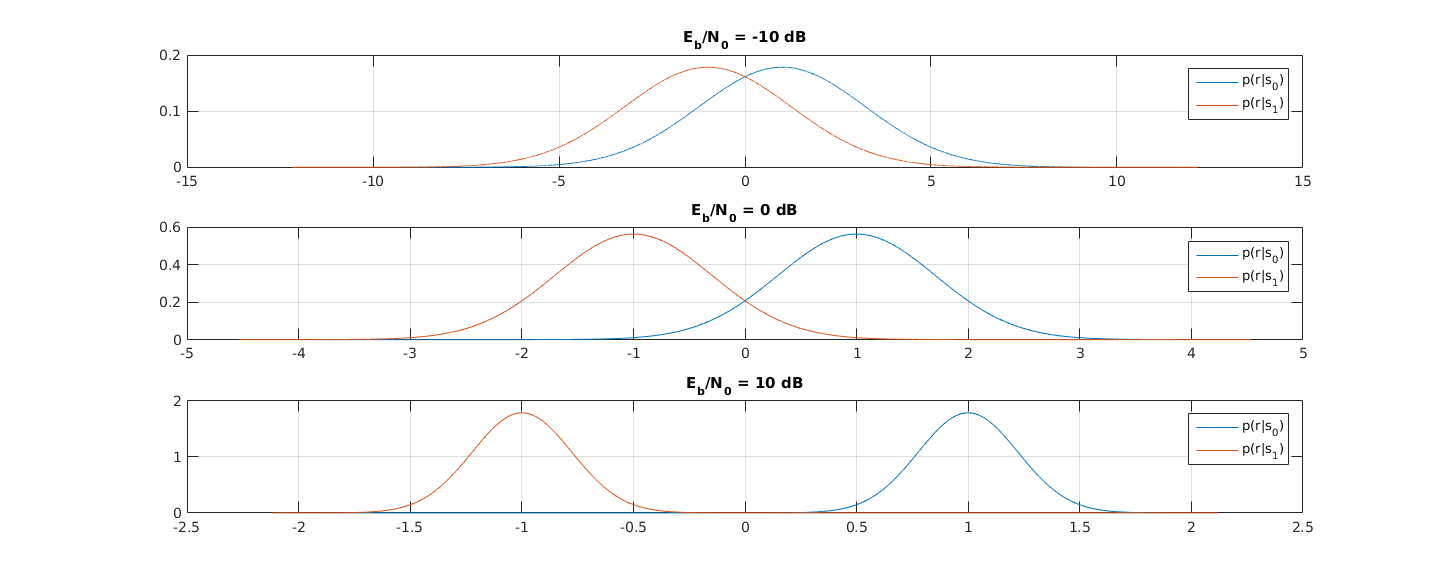

In [3]:
clc;clear all;close all;
%% Parâmetros
Eb = 1;                            % Energia dos pulsos (normalizada para 1)
Er0 = Eb;                          % Média da saída do correlator quando s0 é transmitido
Er1 = -Eb;                         % Média da saída do correlator quando s1 é transmitido
vtEbN0_dB = [-10 0 10];            % Eb/N0s a simular em dB
vtEbN0 = 10.^(vtEbN0_dB/10);       % Eb/N0s a simular em linear
vtVar = Eb*Eb./vtEbN0/2;           % Variância na entrada do detector (= EN0/2)
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 15 6];
for ik = 1 : length(vtEbN0_dB)
    dStd = sqrt(vtVar(ik));
    x=-5*dStd-Eb:0.001:5*dStd+Eb;  % Eixo (5*variância)
    %% Cálculo da distribuição Gausiana
    vtr_0 = normpdf(x,Er0,dStd);   % Valores de r (distribuição de probalilidade r|s0)
    vtr_1 = normpdf(x,Er1,dStd);   % Valores de r (distribuição de probalilidade r|s1)
    %% Gráficos
    %
    subplot(length(vtEbN0_dB),1,ik)
    plot(x,vtr_0,x,vtr_1);
    title(['E_b/N_0 = ' num2str(vtEbN0_dB(ik)) ' dB']);
    legend('p(r|s_0)','p(r|s_1)');
    grid;
end

### Comentários sobre o código

O código é exatamente o mesmo da **Prática 3: Variação do sinal na entrada do (sinais ortogonais)**. A única mudança é no valor da média da saída do correlator quando $s_1(t)$ é transmitido. Seu valor não é zero, mas -$E$ (no código, Er1 = -Eb).                  

Pelo gráficos pode-se ver que $p(r|s_0)$ está centralizada em $E$, enquanto que $p(r|s_1)$ está centralizada em $-E$. Um erro ocorre quando $r<0$ em $p(r|s_0)$ e $r>0$ em $p(r|s_1)$. Isso também implica dizer que quanto maior variância do ruído, maior sua potência e, consequentemente, maior probabilidade de erro, pois mais dispersos (espalhados) estão os valores de $r$. 

# Prática 7: Simulação de Monte Carlo para Sinais Antipodais

A simulação de um enlace de comunicação digital para sinais antipodais também consiste em estimar a probabilidade de erro de bit $P_e$ a partir da taxa de erro de bits (BER). 

Mais uma vez, considerando o tempo e simplicidade que precisamos para um experimento factível em sala de aula, faremos a modelagem de um sistema digital BPSK com sinais antipodais sujeito a um canal AWGN, como ilustra a figura a seguir.

![fig_filtrocasado](./FIGS/HD_09/sim_anti.png)

**O Tranmissor**

Exatamente igual ao do transmissor para sinais ortogonais, mas agora o símbolo $s_0(t)$ tem energia $E$ e o símbolo $s_1(t)$ tem energia -$E$.

**O Canal**

Exatamente igual ao do transmissor para sinais ortogonais, pois estamos interessados em mostrar graficamente as seguintes curvas:

1) $P_e$ teórica vs  Eb/N0; e

2) $BER$ simulada vs  Eb/N0.


**O Receptor**

Aqui reside a grande diferença entre sinais ortogonais e antipodais. Como visto anteriormente, a saída do filtro casado para sinais antipodais pode ser calculado da seguinte forma:

>  $s_{0}$ é transmitido $r = E + n$ 

>  $s_{1}$ é transmitido $r = -E + n$ 

Assim, para modelar a recepção iremos calcular $r$ para cada bit transmitido. Na verdade, a cada bit transmitido, será gerado um sinal $r(t)$ e, por meio dele, $r$ é calculado. Isso encerra a modelagem do correlator (ou do filtro casado).

De posse de $r$ para cada bit transmitido, o detector é modelado como:

> $r > 0 \Rightarrow  s_{0}(t)$, i.e., sinal recebido é mais correlacionado com  $s_{0}(t)$ e se decide pelo bit 0;

> $r < 0  \Rightarrow  s_{1}(t)$, i.e., sinal recebido é mais correlacionado com  $s_{1}(t)$ e se decide pelo bit 1.

Ao final temos uma sequência de bits detectados.

**Cálculo da BER**

De posse da sequência de bits transmistidos e de bits detectados, fazemos a contagem dos bits diferentes nos dois vetores, calculando $n_{err}$. Finalmente, a $BER$ é calculada como:

$$BER = \frac{n_{err}}{n_{bits}}.$$

O próximo experimento modela os passos acima.

**Passo 01:** Abra um script no Matlab, salve-o como **simAntipodal.m** e escreva o seguinte código. Salve esse script na pasta que se encontra o arquivo **h09.ipynb** (este arquivo). Na verdade, esse arquivo **.m** não é um script, mas uma função do Matlab que será chamada posteriormente pelo código principal do simulador.

In [ ]:
function [dBER] = simAntipodal(EbN0_dB,nMCSamples)
% Simula a BER para sinais antipodais para uma dada Eb/N0 em dB
%
% Parâmetros de Entrada:
%
%  EbN0_dB: Eb/N0, considerando Eb = 1
%  nMCSamples: número de bits transmitidos para estimar a BER
%
% Saídas
% 
%  dBER: BER estimada
%
% Essa função deve ser salva com o nome simAntipodal.m na mesma pasta 
% do arquivo h09.ipynb
%
% Exemplo de uso: [dBER] = simAntipodal(10,1e5);

% Parâmetros
dE = 1;                           % Energia do sinal s0 e s1
dEbN0 = 10^(EbN0_dB/10);          % Eb/No em escala linear
dsgma = dE/sqrt(2*dEbN0);         % Desvio padrão do ruído
%
%% Transmissão
% Geração dos números binários 0 e 1 com igual probabilidade
vtBin = randi([0 1],1,nMCSamples);
% Acha os índice de bits iguais a 0
vtIndex0 = find(vtBin == 0);
% Acha os índice de buts iguais a 1
vtIndex1 = find(vtBin == 1);
%
%% Recepção e detecção de erro
% Gera saída do correlator para cada transmissão de s0 e de s1
vtr(vtIndex0) = dE + dsgma*randn(1,length(vtIndex0));
vtr(vtIndex1) = -dE + dsgma*randn(1,length(vtIndex1));
%
% Detecção: 0 se, r > 0; e 1, se r < 0
vtBinDetec = vtr < 0;
%
% Detecção de erros (soma dos vetores originais e detectados)
% 0 + 0 = 0 (acerto)
% 1 + 1 = 2 (acerto)
% 0 + 1 = 1 (erro)
% 1 + 0 = 1 (erro)
vtError = vtBin + vtBinDetec; 
nErrors = length(find(vtError == 1));
% Cálculo da BER
dBER = nErrors/nMCSamples;

**Passo 02:** Abra um script no Matlab, salve-o como **handson9_7.m** e escreva o seguinte código. Esse é o corpo principal da campanha de simulação. Ele chamará as funções **simOrtogonal.m** e **simAntipodal.m** (corpo do simuladores) várias vezes, com parâmetros de entrada diferentes e montará as curvas $BER$ vs $E_b/N_0$ e as curvas $P_e$ teórica vs $E_b/N_0$ em um mesmo gráfico para os dois tipos de sinais.

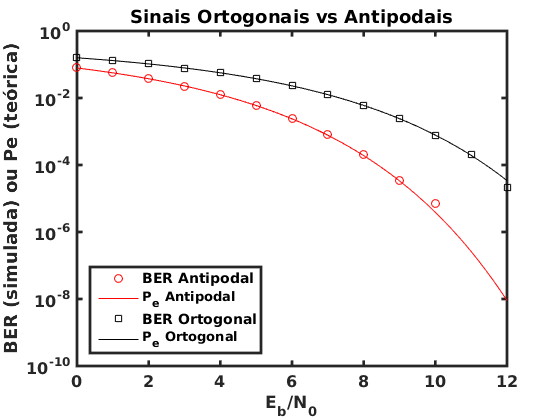

In [7]:
clear all;close all;clc;
%% parâmetros
vtEbN0Sim_db = 0:1:12;
nMCSamples = 1e6;
vtEbN0Teo_dB = 0:0.1:12;
vtEbN0Teo = 10.^(vtEbN0Teo_dB/10);
%
%% Gera a BER simulada
for ik = 1 : length(vtEbN0Sim_db)
    vtSimErrorAnti(ik)= simAntipodal(vtEbN0Sim_db(ik), nMCSamples);
    vtSimErrorOrto(ik)= simOrtogonal(vtEbN0Sim_db(ik), nMCSamples);
end
%
%% Calcula a Pe teórica
vtTeoErrorAnti = qfunc(sqrt(2*vtEbN0Teo));
vtTeoErrorOrto = qfunc(sqrt(vtEbN0Teo));
%
%% Gráficos
semilogy(vtEbN0Sim_db,vtSimErrorAnti,'or');
hold on;
semilogy(vtEbN0Teo_dB,vtTeoErrorAnti,'r');
semilogy(vtEbN0Sim_db,vtSimErrorOrto,'sk');
semilogy(vtEbN0Teo_dB,vtTeoErrorOrto,'k');
legend('BER Antipodal', 'P_{e} Antipodal','BER Ortogonal', 'P_{e} Ortogonal','Location','southwest');
set(gca,'linewidth',2,'fontsize',12,'fontweight','bold');
xlabel('E_b/N_0');
ylabel('BER (simulada) ou Pe (teórica)');
title('Sinais Ortogonais vs Antipodais');

É possível notar uma diferença significativa de desempenho entre a comunicação com sinal antipodal e com sinal ortogonal. Para o mesmo patamar de $E_b/N_0$, a BER para sinais antipodais é bem menor que para sinais ortogonais. Isso se deve exclusivamente a diferença de energia entre os sinais que representam o bit 1 e o bit 0 em cada caso.

Para sinais ortogonais, a diferença de energia entre os sinais $s_0(t)$ e $s_1(t)$ é igual a $E$, enquanto que esse valor é 2$E$ para sinais antipodais. Isso é ilustrado nas figuras a seguir como uma distância entre os símbolos $s_0(t)$ e $s_1(t)$.

![fi_d_anti](./FIGS/HD_09/d_anti.png)
![fi_d_anti](./FIGS/HD_09/d_orto.png)

Tendo como base a distância $d$ entre os sinais $s_0(t)$ e $s_1(t)$, podemos escreve a probabilidade de erro de maneira genérica, como:

$$P_{e} = Q\left (  \sqrt{\frac{d^2}{2N_{0}}} \right )$$

Assim, se ajustarmos a amplitude dos pulsos, podemos fazer com que transmissões com sinais ortogonais e antipodais tenham mesmo desempenho. Mas ao fixar $E=1$, encontraremos a diferença de desempenho mostrada nesse experimento.


# Bibliografia

[Is there a difference between correlation processing and matched filter processing?](https://physics.stackexchange.com/questions/123665/is-there-a-difference-between-correlation-processing-and-matched-filter-processi)

[A Função Erro e Outras Funções Relacionadas.](http://www.obaricentrodamente.com/2013/04/a-funcao-erro-e-outras-funcoes.html)

John G. Proakis, Masoud Salehi, John G. Proakis, Modern Communication Systems Using MATLAB, 3rd Edition, CENAGE Learning,2013.

HAYKIN, S.; MOHER, M. Sistemas de comunicação. 5. ed. Porto Alegre: Bookman, 2011. 512 p.

C. Richard Johnson Jr, William A. Sethares, Andrew G. Klein, Software Receiver Design 1st Edition, Cambridge University Press; 1 edition (August 18, 2011).

Lathi,B. P., Sistemas de Comunicações Analógicos e Digitais Modernos - 4ª Ed, LTC, 2012.


Varsha Mathuranathan, Digital Modulations using Matlab: Build Simulation Models (http://www.gaussianwaves.com).

Behrouz Forouzan, Data Communications and Networking (McGraw-Hill Forouzan Networking), 4th Edition, February 9, 2006.


[Diagrama de olho, IFSC.](http://www.sj.ifsc.edu.br/~saul/sistemas%20opticos/diagrama%20do%20olho.pdf)

[Prof. Gil Pinheiro, Análise Estatística de Sistemas de Comunicação Digitais – Usando o Diagrama de Olho, 2010.](http://www.lee.eng.uerj.br/~gil/filas/Diagrama%20de%20Olho.pdf)